# how to find a gift using simple data science techniques

# problem statement

| [![](./img/timo_grumpy.jpg)]()  | [![](./img/melanie_grumpy.jpg)]() | [![](./img/alon_grumpy.jpg)]() |
|:---:|:---:|:---:|
| <span style="font-size:large;">timo sorrow-stricken</span> | <span style="font-size:large;">melanie sorrow-stricken</span> | <span style="font-size:large;">alon sorrow-stricken</span> |

| [![](./img/timo_excited.jpg)]()  | [![](./img/melanie_happy.jpg)]() | [![](./img/alon_excited.jpg)]() |
|:---:|:---:|:---:|
| <span style="font-size:large;">timo happy</span> | <span style="font-size:large;">melanie happy</span> | <span style="font-size:large;">alon happy </span> |

## what can we do?

* be good students!

* spread the data science virus across the organisation

* __let's give them a gift (using simple data science techniques)__

| [![](./img/timo_philosophical.jpg)]()  | [![](./img/chocolate.jpg)]() | [![](./img/marshmallow.jpg)]() | [![](./img/cookies.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">timo undecided</span> | <span style="font-size:large;">chocolate</span> | <span style="font-size:large;">marshmallow</span> | <span style="font-size:large;">cookies</span> |

| [![](./img/melanie_phylosophical.jpg)]()  | [![](./img/red_wine.jpg)]() | [![](./img/white_wine.jpg)]() | [![](./img/rose_wine.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">melanie undecided</span> | <span style="font-size:large;">red wine</span> | <span style="font-size:large;">white wine</span> | <span style="font-size:large;">rose</span> |

| [![](./img/alon_phylosophical.jpg)]()  | [![](./img/JAZZ_MUSIC.jpg)]() | [![](./img/classical_music.jpg)]() | [![](./img/pop_music.jpg)]() |
|:---:|:---:|:---:|:---:|
| <span style="font-size:large;">alon undecided</span> | <span style="font-size:large;">a jazz cd</span> | <span style="font-size:large;">a classic cd</span> | <span style="font-size:large;">a pop cd</span> |

# our solution

# let's train a classification model
[![](./img/model_predict.png)]() 

# small excursion: what's a classifier?
<img src="./img/train_model.png" style="height: 600px;"/>

# small excursion: what's a classifier?
<img src="./img/predict_on_training.png" style="height: 600px;"/>

# small excursion: pitfalls...
[![](./img/overfit.png)]() 


# reduce model complexity...
[![](./img/better_generizability.png)]() 

# but how getting to a gift classification model?

1. __data collection and labeling__

 * pick one gift type per group (i.e. either wine, sweets or music)

 * ideate 4 categorical people attributes that could be related to wine/sweets/music taste (e.g. gender → male|female, preferred_dish → fish|meat|vegetables etc).
 __choose 2-4 categories per attribute, not more__

* prepare an csv sheet based on the questionaire.csv in the folder

* do interviews with all participants and fill out your sheet. for everything you enter always check your spelling (e.g. male is always male, not Male, MALE or malle). seperate two attributes by ",".

* also interview the corresponding facilitators, but don't ask for the label (__remember we want to predict__),e.g. Melanie Heroult,,female,brown hair, etc. For Melanie ask Alon.

#### it should look something like this in the end
[![](./img/questionaire.png)]() 

__2\. data preparation, exploration and visualization__

* split the data into training (the participants) and prediction set (the facilitators)

* understand the data and find out how the individual attributes relate to the label

* visualize findings

__3\. model generation on training data (the participants)__

__4\. the prediction on unlabelled data (the facilitators)__

# let's get our hands dirty

# data preparation, exploration and visualization

* ok, please fasten your seat belts: codings starts now

In [82]:
# import libraries
import pandas as pd # library for data handling (PANel DAta, common term for multidimensional data)
import seaborn as sns # library for plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ggayq/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [83]:
# read in the data from the prepared excel sheet
data = pd.read_excel('data/wine_taste.xlsx', index_col = 'Name') # modify the filename accordingly

In [84]:
# let's inspect the data
data

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


do you see something abnormal?

__we now need to split into training data (=all participants) and prediction data (=facilitator)__

In [85]:
data.loc[pd.isnull(data.Label),:]

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Melanie,NaN,spicy,female,extrovert,out


In [86]:
data.loc[~pd.isnull(data.Label),:]

,Label,Taste,Gender,Personality,eat_in_or_out
Name,,,,,
Peter,red,sweet,male,introvert,in
Andreas,white,spicy,male,extrovert,in
James,red,sweet,male,extrovert,in
Jim,white,spicy,male,introvert,out
John,white,spicy,male,extrovert,out
Daniel,white,hot,male,extrovert,in
Catherine,rose,hot,female,extrovert,out
Paula,rose,hot,female,introvert,out
Adrian,red,sweet,male,extrovert,in


In [87]:
train = data.loc[~pd.isnull(data.Label),:]
test = data.loc[pd.isnull(data.Label),:]

In [88]:
# count of categories
data.Label.value_counts()

white    9
red      7
rose     4
Name: Label, dtype: int64

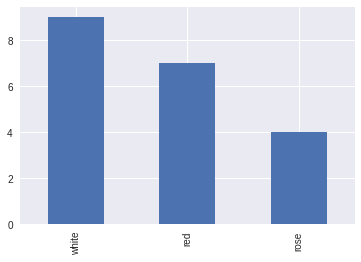

In [89]:
data.Label.value_counts().plot.bar()

Taste


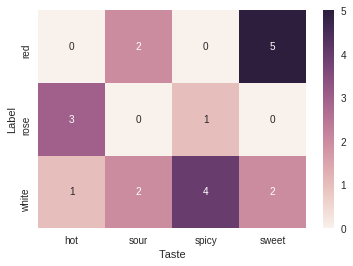

Gender


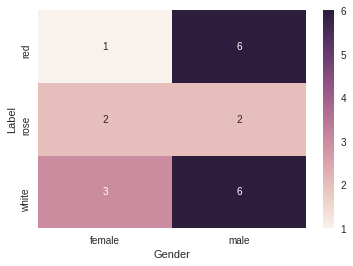

Personality


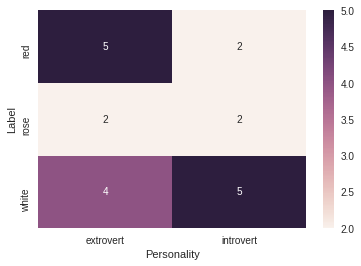

eat_in_or_out


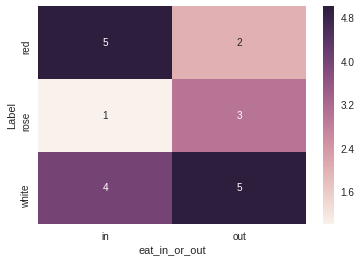

In [90]:
for attribute in train.drop('Label',axis = 1).columns:
    print(attribute)
    sns.heatmap(pd.crosstab(train.Label, train[attribute]), annot = True)
    show()

# model generation on training data (the participants)

# decision tree
[![](./img/decision_tree.png)]() 

# random forest
[![](./img/random_forrest.png)]() 

In [91]:
# import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [92]:
# generate one-hot encoding
train_one_hot = pd.get_dummies(train.drop('Label', axis = 1))
test_one_hot = pd.get_dummies(test.drop('Label', axis = 1))
test_one_hot = test_one_hot.loc[:,train_one_hot.columns].fillna(0).astype('int') # sorry that's a little dirty (but data science reality)

In [93]:
train_one_hot.head(5)

,Taste_hot,Taste_sour,Taste_spicy,Taste_sweet,Gender_female,Gender_male,Personality_extrovert,Personality_introvert,eat_in_or_out_in,eat_in_or_out_out
Name,,,,,,,,,,
Peter,0,0,0,1,0,1,0,1,1,0
Andreas,0,0,1,0,0,1,1,0,1,0
James,0,0,0,1,0,1,1,0,1,0
Jim,0,0,1,0,0,1,0,1,0,1
John,0,0,1,0,0,1,1,0,0,1


In [94]:
# instantiate the model
clf = RandomForestClassifier()

In [95]:
# fit the model to the training data
clf.fit(train_one_hot,train.Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
pred_labels = clf.predict(test_one_hot)

[![](./img/drumroll.png)]() 

In [97]:
print('the model predicts: {} loves {} wine'.format(test.index[0],pred_labels[0]))

the model predicts: Melanie loves white wine


# reflection

* stages of a data science project

* feature engineering influences model outcome

* data exploration to check validity of data

* good programmers don't reinvent the wheel